# Stage 2 - Member Task (U.S. Opioid Epidemic)

### Understand the distribution and measures of center for US opioid mortality for 2019 (20 pts)
### Import the super dataframe created in Stage I

In [12]:
import pandas as pd

In [13]:
df_superdataset = pd.read_csv("../../../../data/stage_1/superDatasetAditi.csv")

### Create a histogram of Normalized Deaths variable for entire US as a distribution.

In [14]:
df_superdataset["Norm_Deaths"] = (df_superdataset["Deaths"]/df_superdataset["Population"])*100000
df_superdataset["Norm_Deaths"]=round (df_superdataset["Norm_Deaths"])
df_superdataset.head()

,Unnamed: 0,Notes,County_x,County Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate,State FIPS Code,...,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,County_y,FIPS,Opiod_Dispensing_Rate,Norm_Deaths
0,0,NaN,"Autauga County, AL",1001,Drug poisonings (overdose) Unintentional (X40-...,D1,69,1087149,6.3,1,...,NaN,NaN,NaN,NaN,NaN,AL,Autauga County,1001,101.3,6.0
1,1,NaN,"Autauga County, AL",1001,Drug poisonings (overdose) Suicide (X60-X64),D2,14,1087149,Unreliable,1,...,NaN,NaN,NaN,NaN,NaN,AL,Autauga County,1001,101.3,1.0
2,2,NaN,"Baldwin County, AL",1003,Drug poisonings (overdose) Unintentional (X40-...,D1,424,3758097,11.3,1,...,NaN,NaN,NaN,NaN,NaN,AL,Baldwin County,1003,67.6,11.0
3,3,NaN,"Baldwin County, AL",1003,Drug poisonings (overdose) Suicide (X60-X64),D2,71,3758097,1.9,1,...,NaN,NaN,NaN,NaN,NaN,AL,Baldwin County,1003,67.6,2.0
4,4,NaN,"Baldwin County, AL",1003,Drug poisonings (overdose) Undetermined (Y10-Y14),D4,19,3758097,Unreliable,1,...,NaN,NaN,NaN,NaN,NaN,AL,Baldwin County,1003,67.6,1.0


#### Use plotly to plot histogram

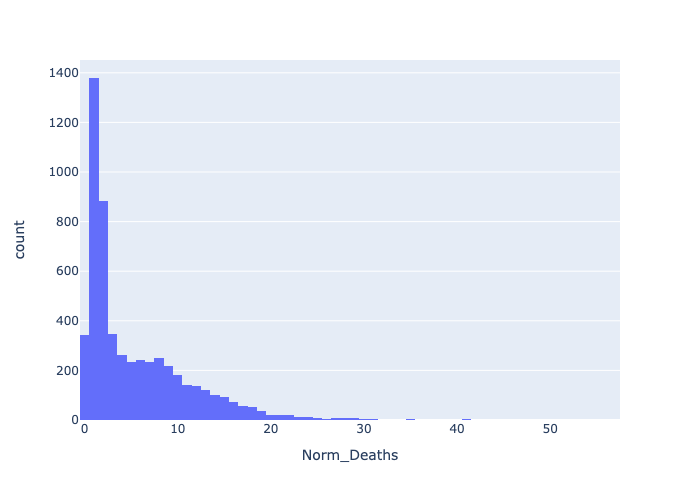

In [15]:
import plotly.express as px
from IPython.display import Image 

fig = px.histogram(df_superdataset, x="Norm_Deaths")
fig.write_image("images/histogram.png")
pil_img = Image(filename='images/histogram.png')
display(pil_img)

### Add a vertical line to the histogram representing the mean Normalized Opioid Death for US

In [16]:
df1=df_superdataset["Norm_Deaths"].mean(axis = 0, skipna = True)
(df1)

5.543156374142289

In [17]:
df2=df_superdataset["Norm_Deaths"].median(axis = 0, skipna = True)

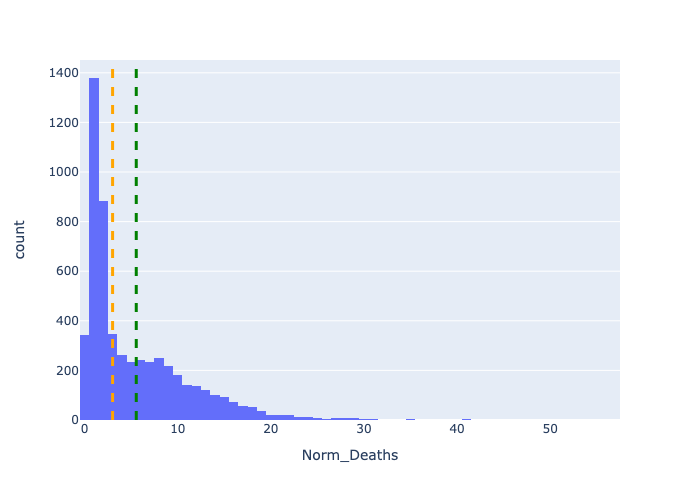

In [18]:
import plotly.express as px
fig = px.histogram(df_superdataset, x="Norm_Deaths")
fig.add_vline(x=df1, line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x=df2, line_width=3, line_dash="dash", line_color="orange")
fig.write_image("images/histogramWithLine.png")
pil_img = Image(filename='images/histogramWithLine.png')
display(pil_img)

### M1.2 Understand variable to mortality relationships for 2019 data (40 pts)

### Here we codify the column Normalized Deaths (Number of Deaths per 100k Population - Norm_Deaths) and store it as a label column. (10 pts)
### Very Low (v_low) - [1.999 - 8.0]
### Low (low) - [8.0 - 11.0]
### High (high) - [11.0 - 16.0]
### Very High (v_high) - [16.0 - 64.0]

In [19]:
df_superdataset.Norm_Deaths.describe()

count    5538.000000
mean        5.543156
std         5.967799
min         0.000000
25%         1.000000
50%         3.000000
75%         8.000000
max        57.000000
Name: Norm_Deaths, dtype: float64

#### Using the pandas cut function to get the quantile distribution and divide the data of Norm_Deaths into labels as per the range 1.999 to 8.0 as Very low, range 8.0 to 11.0 as low, range 11.0 to 16.0 as High, range 16.0 to 64.0 as VeryHigh

In [20]:
quantile = pd.cut(df_superdataset.Norm_Deaths, [1.999,8.0,11.0,16.0,64.0], labels=['Very Low','Low','High','Very High'])
quantile.dropna()[:20]

0     Very Low
2          Low
3     Very Low
6     Very Low
7         High
8         High
10    Very Low
11         Low
15    Very Low
16         Low
17    Very Low
18    Very Low
19        High
20    Very Low
21    Very Low
22    Very Low
23    Very Low
24    Very Low
26         Low
27    Very Low
Name: Norm_Deaths, dtype: category
Categories (4, object): ['Very Low' < 'Low' < 'High' < 'Very High']

### Now try the variables you have identified in Stage I and plot them as a second variable to Normalized Mortality in a scatter plot to observe any trends

### Variables identified in Stage I:
* County Code/FIPS 
* State
* Population
* Opioid Dispensing rate 
* Crude Rate
* Drug/Alcohol induced cause 
* Deaths
* Premature death 
* Ratio of population to primary care physicians


### Plotting Normalized Mortality against County Code/FIPS

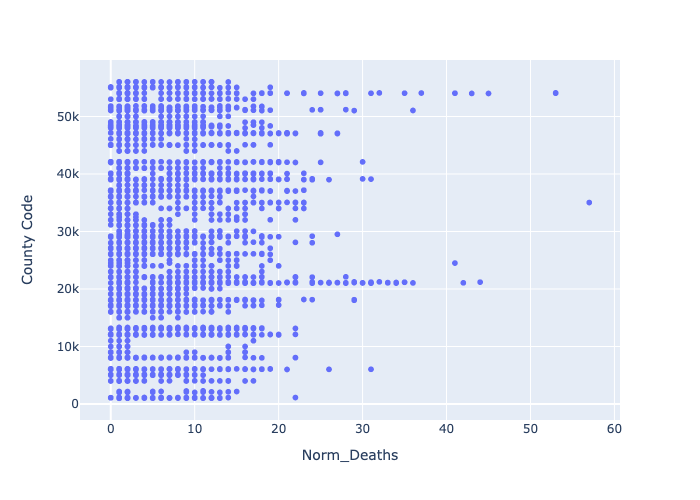

In [21]:
fig = px.scatter(df_superdataset, x="Norm_Deaths", y="County Code")
fig.write_image("images/county_code.png")
pil_img = Image(filename='images/county_code.png')
display(pil_img)

### Plotting Normalized Mortality against State

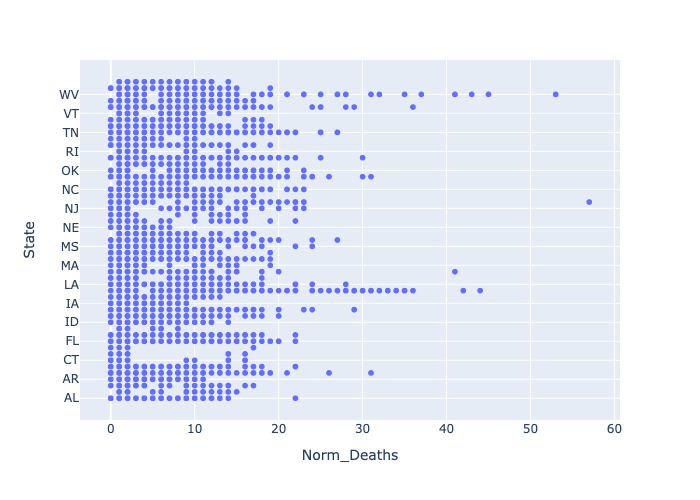

In [22]:
fig = px.scatter(df_superdataset, x="Norm_Deaths", y="State")
fig.write_image("images/state.png")
pil_img = Image(filename='images/state.png')
display(pil_img)

### Plotting Normalized Mortality against Population

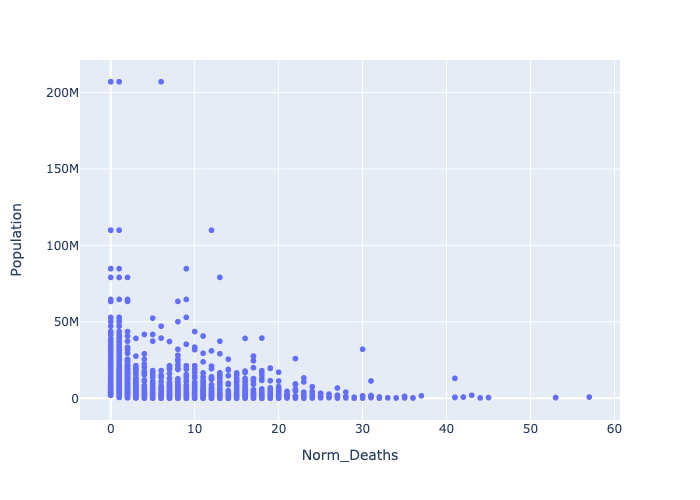

In [23]:
fig = px.scatter(df_superdataset, x="Norm_Deaths", y="Population")
fig.write_image("images/population.png")
pil_img = Image(filename='images/population.png')
display(pil_img)

### Plotting Normalized Mortality against Opioid Dispensing rate

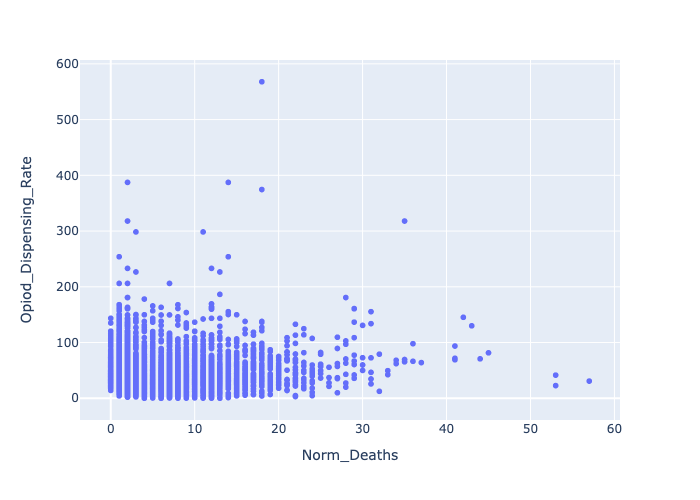

In [24]:
fig = px.scatter(df_superdataset, x="Norm_Deaths", y="Opiod_Dispensing_Rate")
fig.write_image("images/opioid_dispensing_rate.png")
pil_img = Image(filename='images/opioid_dispensing_rate.png')
display(pil_img)

### Plotting Normalized Mortality against Crude Rate

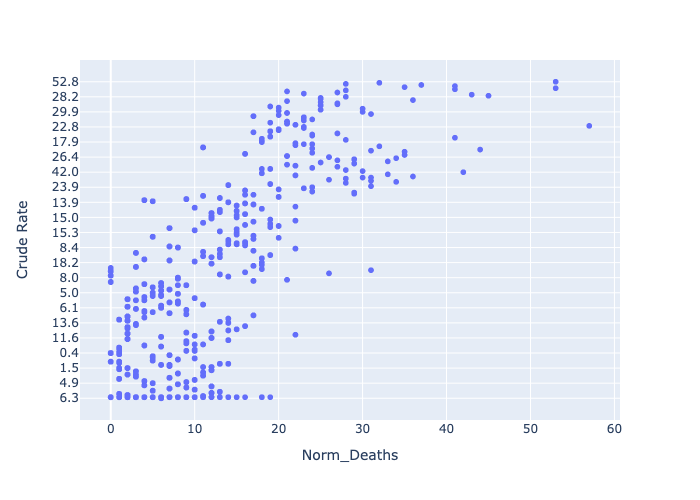

In [25]:
fig = px.scatter(df_superdataset, x="Norm_Deaths", y="Crude Rate")
fig.write_image("images/crude_rate.png")
pil_img = Image(filename='images/crude_rate.png')
display(pil_img)

### Plotting Normalized Mortality against Drug/Alcohol induced cause

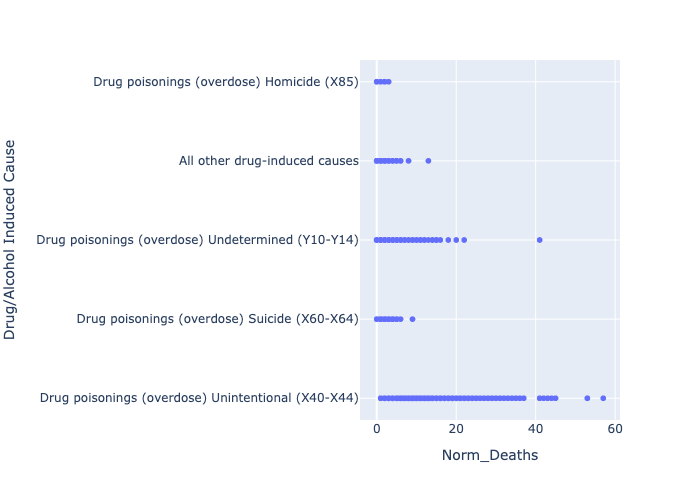

In [26]:
fig = px.scatter(df_superdataset, x="Norm_Deaths", y="Drug/Alcohol Induced Cause")
fig.write_image("images/drug_alcohol_induced_rate.png")
pil_img = Image(filename='images/drug_alcohol_induced_rate.png')
display(pil_img)

### Plotting Normalized Mortality against Premature death

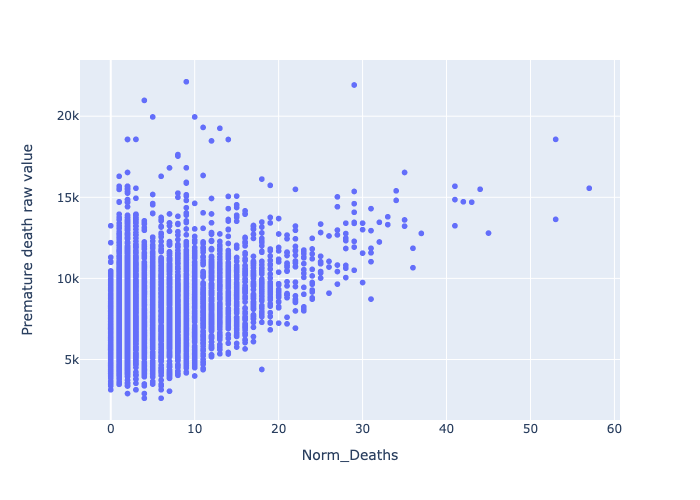

In [29]:
fig = px.scatter(df_superdataset, x="Norm_Deaths", y="Premature death raw value")
fig.write_image("images/premature_death.png")
pil_img = Image(filename='images/premature_death.png')
display(pil_img)

### Plotting Normalized Mortality against Ratio of population to primary care physicians

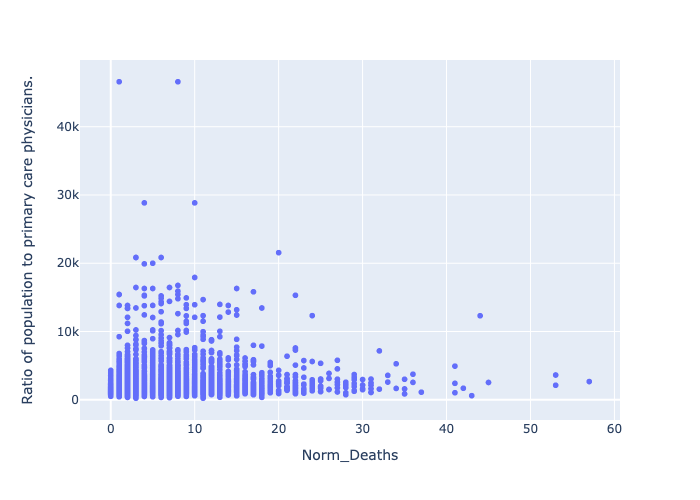

In [30]:
fig = px.scatter(df_superdataset, x="Norm_Deaths", y="Ratio of population to primary care physicians.")
fig.write_image("images/primary_care.png")
pil_img = Image(filename='images/primary_care.png')
display(pil_img)

### Inferences:
* We can infer from the above graph the state NM(New Mexico) is having highest mortality in overall states.
* We can infer that for high crude rate the normalized death number is higher. For lower crude rate, the normalized death count is low.
* For Drug poisioning (overdose) unintentional the death factor is highest and drug poisioning(overdose)homicide is the lowest
* For Ratio of population to primary care are higher we can infer the normalised deaths are low.
    

### Extra Credit - Use variables dynamically in a dashboard using Plotly widget for jupyter

### Importing libraries

In [20]:
import plotly.graph_objects as go
from ipywidgets import widgets

#### Creating array of Variables to plot against normalized deaths

In [21]:
variables_list = ["County Code", "State", "Population", "Opiod_Dispensing_Rate", "Crude Rate", "Drug/Alcohol Induced Cause", "Premature death raw value", "Ratio of population to primary care physicians."]

#### Creating dropdown widget to select variables

In [22]:
origin = widgets.Dropdown(
    options=variables_list,
    value='State',
    description='Variables',
    width='100px'
)

#### Use scatter plot to provide camparision of data and pass to the widget

In [23]:
# Assign an empty figure widget with two traces
trace1 = go.Scatter(x=df_superdataset['Norm_Deaths'],y=df_superdataset['Population'],mode='markers')
g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title=dict(
                            text='Variable plotted against Normalized Deaths'
                        ),
                        barmode='overlay'
                    ))

#### Created a defination to change the values of scatter plot based on selection of variable 

In [24]:
def response(change):
    x1 = origin.value
    with g.batch_update():
        g.data[0].y = df_superdataset[x1]
        g.layout.barmode = 'overlay'
        g.layout.xaxis.title = 'Normalized Deaths'
        g.layout.yaxis.title = x1

In [25]:
origin.observe(response, names="value")

In [26]:
container = widgets.HBox([origin])
widgets.VBox([container,
              g])